# **The Sparks Foundation**

# **GRIP October 2023**

## **Data Science & Business Analytics**

## **Author: Asad Tariq Sheikh**

## **Task 3: Exploratory Data Analysis**

(Level - Beginner)

Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'

• As a business manager, try to find out the weak areas where you can work to make more profit.

• What all business problems you can derive by exploring the data?

Dataset: https://raw.githubusercontent.com/asadsheikh1/TheSparksFoundation/main/Retail%20Store.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing CSV**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/asadsheikh1/TheSparksFoundation/main/Retail%20Store.csv')

# **Reading CSV**

In [3]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
data.shape

(9994, 13)

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **Dropping Columns**

As country is same for all which is `United States` and postal code - we don't need to work upon.

In [9]:
data.drop(['Country', 'Postal Code'], axis=1, inplace=True)

In [10]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### **Check minimum Sales**

In [11]:
data['Sales'].min()

0.444

### **Check maximum Sales**

In [12]:
data['Sales'].max()

22638.48

### **Check minimum Profit**

In [13]:
data['Profit'].max()

8399.976

In [14]:
print(f"The total Sales = {data['Sales'].sum()}")
print(f"The total Profit = {data['Profit'].sum()}")

The total Sales = 2297200.8603000003
The total Profit = 286397.0217


In [15]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
data.shape

(9994, 11)

In [17]:
data.duplicated().sum()

50

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


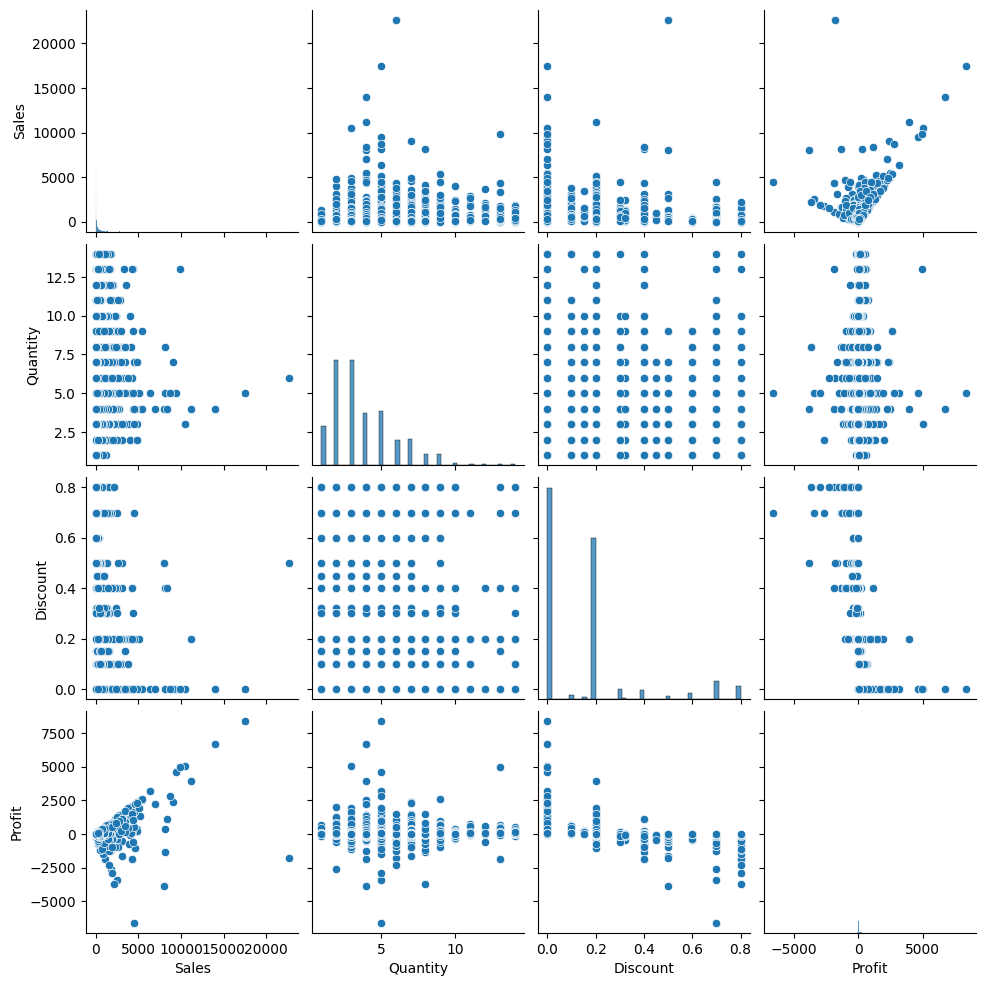

In [20]:
sns.pairplot(data)

1. As Discount increases Profit decreases
2. As Discount increases Sales decreases
3. As Sales increases Profit increases

In [21]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


To list the numbers in ascending order, let's consider the diagonal elements of the matrix and arrange them in ascending order:

1. -0.219939 (Discount and Profit)

2. -0.028625 (Sales and Discount)

3. 0.008307 (Quantity and Discount)

4. 0.066089 (Quantity and Profit)

5. 0.200469 (Sales and Quantity)

6. 0.479078 (Sales and Profit)

7. 1.000000 (Diagonal elements)

**Most correlation - 0.479078 (Sales and Profit)**

**Least correlation - 0.008307 (Quantity and Discount)**

Text(0.5, 1.0, 'Heatmap on Sample Superstore')

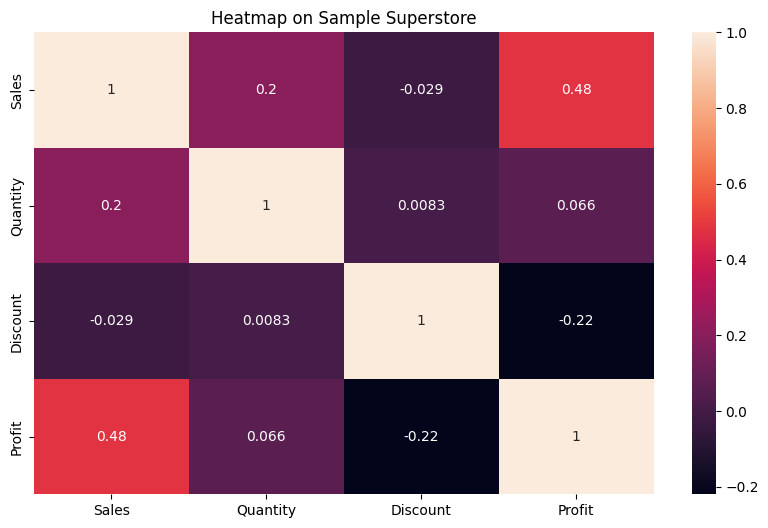

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap on Sample Superstore')

1. Most correlation - Sales & Profit
2. Least correlation - Discount & Quantity

# **Ship Mode**

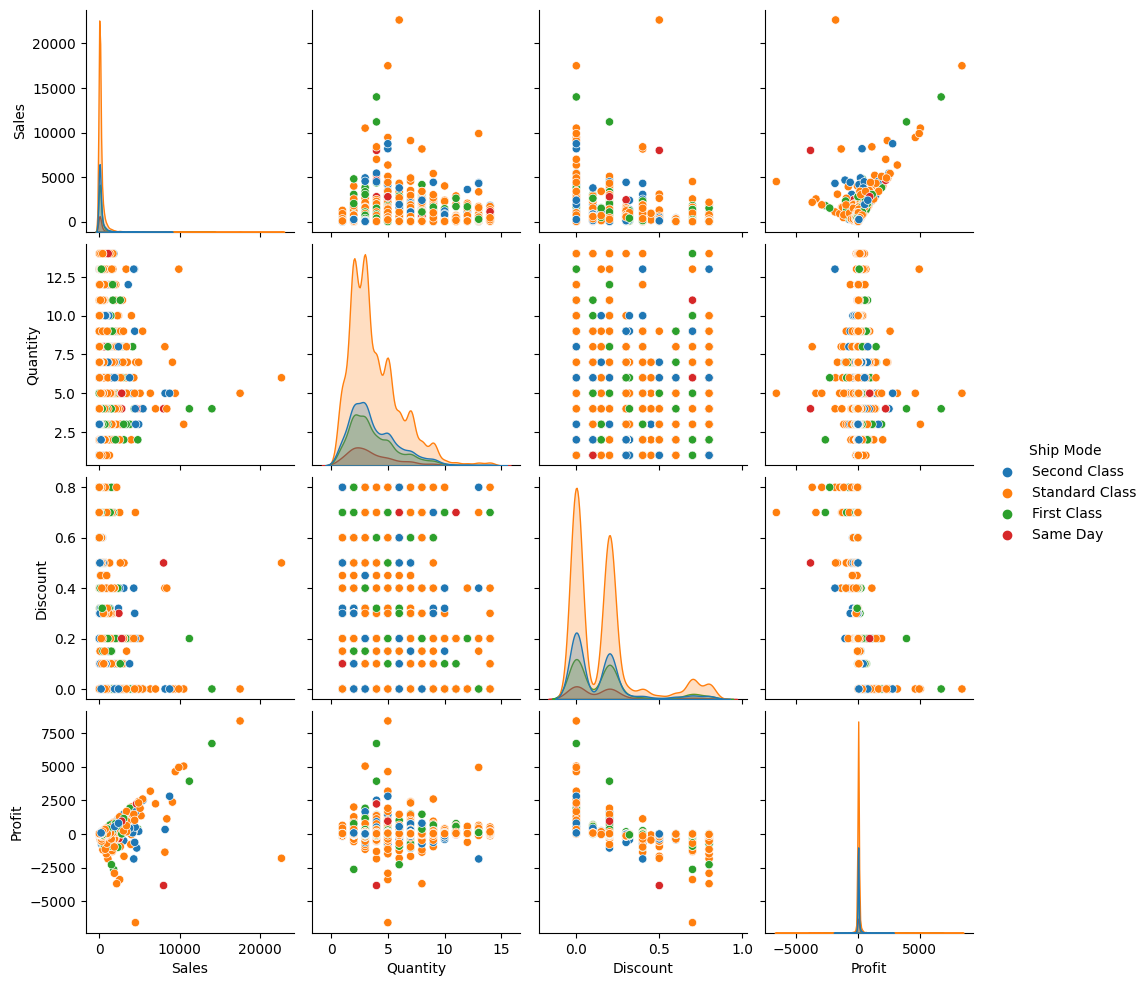

In [23]:
sns.pairplot(data, hue='Ship Mode')

In [24]:
data['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

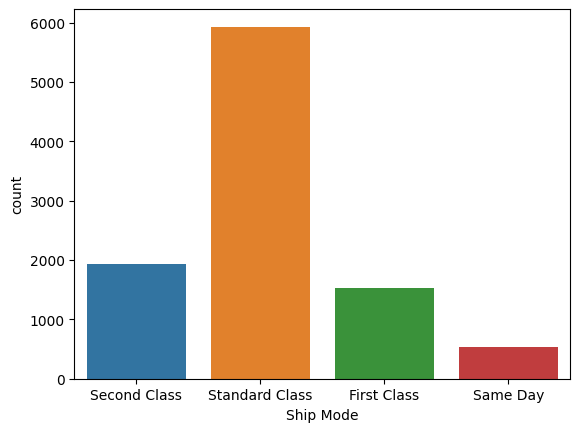

In [25]:
sns.countplot(x=data['Ship Mode'])

1. Most opted Ship Mode - Standard Class

2. Least opted Ship Mode - Same Day

In [26]:
profit_and_sales = data.groupby('Ship Mode')[['Profit', 'Sales']].sum()
profit_and_sales

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


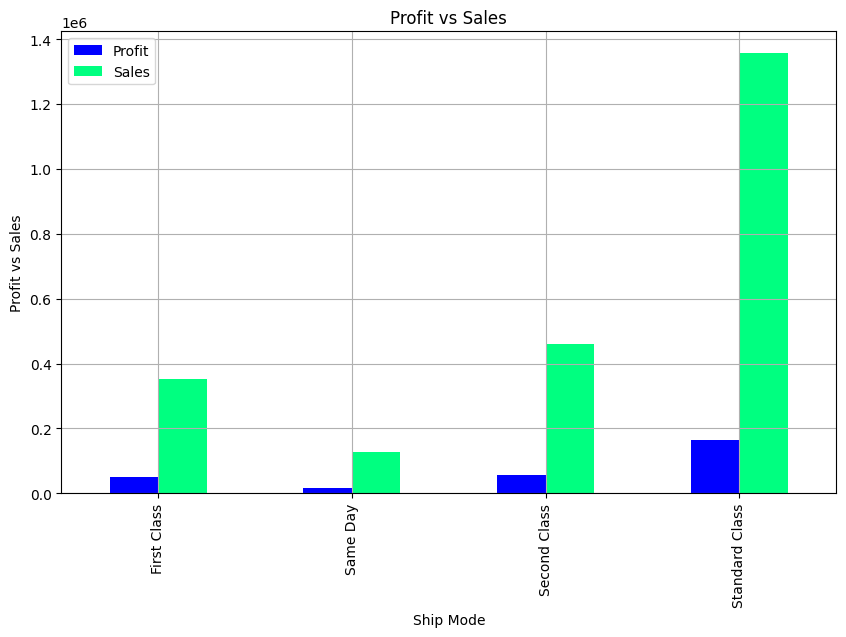

In [27]:
profit_and_sales.plot(kind='bar', figsize=(10, 6), cmap='winter')
plt.title('Profit vs Sales')
plt.ylabel('Profit vs Sales')
plt.grid()
plt.show()

1. Maximum Profit & Sales - Standard Class

2. Minimum Profit & Sales - Same Day

# **Category**

In [28]:
category = data['Category'].value_counts()
category

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

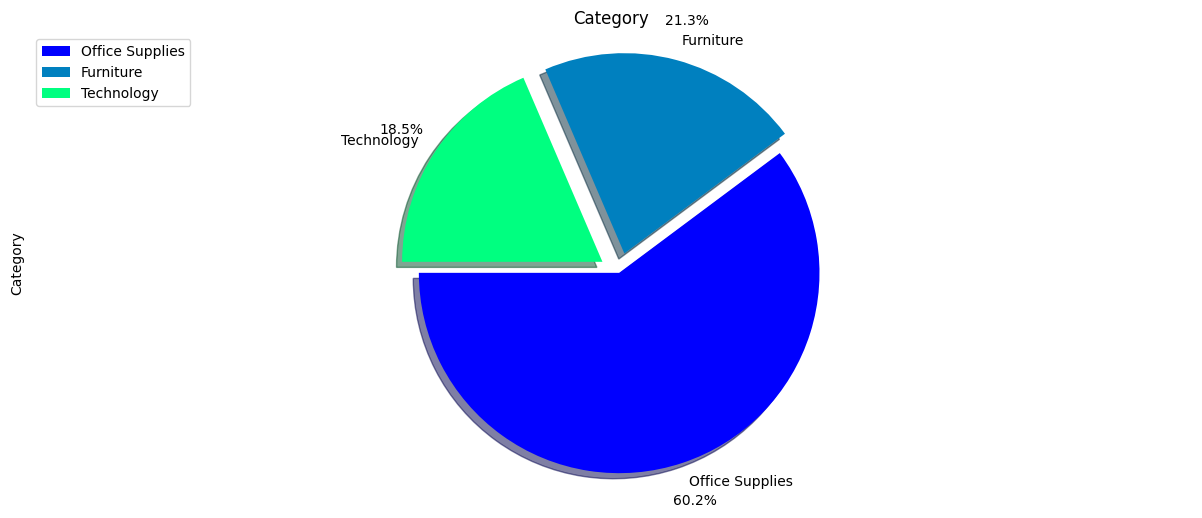

In [29]:
category.plot(kind='pie', figsize=(15, 6), shadow=True, startangle=180, explode=[0, 0.1, 0.1], autopct='%1.1f%%', pctdistance=1.2, cmap='winter')
plt.title('Category')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

1. Most distribution - Office Supplies (60.2%)

2. Least distribution - Technology (18.5%)

In [30]:
category_sales = data.groupby('Category')['Sales'].sum()
category_sales

Category
Furniture          740568.6663
Office Supplies    718256.0700
Technology         835774.6410
Name: Sales, dtype: float64

In [31]:
category_profit = data.groupby('Category')['Profit'].sum()
category_profit

Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64

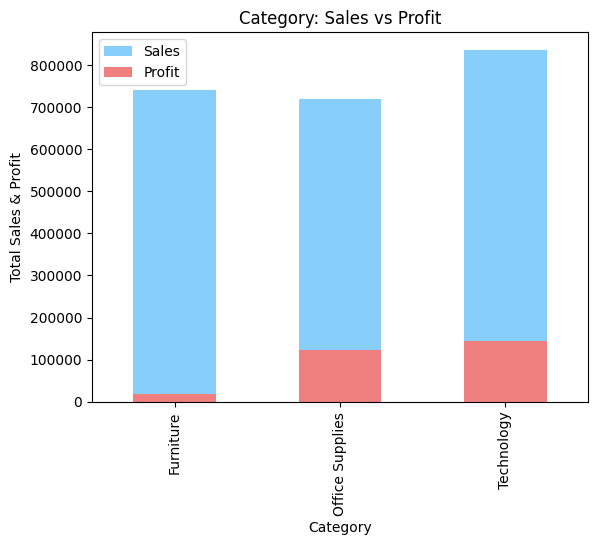

In [32]:
ax0 = category_sales.plot(kind='bar', color='lightskyblue')
ax0 = category_profit.plot(kind='bar', color='lightcoral')

ax0.set_title('Category: Sales vs Profit')
ax0.set_ylabel('Total Sales & Profit')

plt.legend()
plt.show()

1. Maximum Profit & Sales - Technology

2. Minimum Profit & Sales - Office Supplies

# **Sub-Category**

In [33]:
sub_category = data['Sub-Category'].value_counts()
sub_category

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

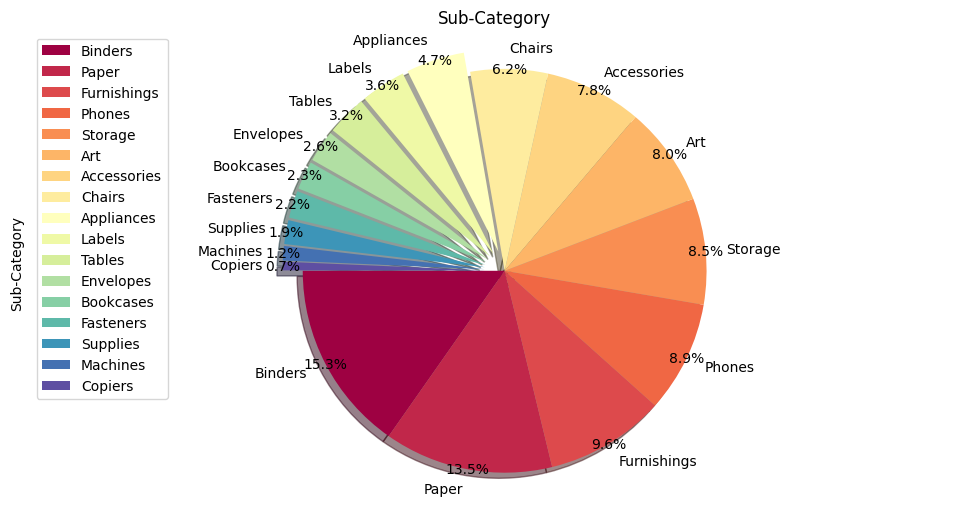

In [34]:
sub_category.plot(kind='pie', figsize=(12, 6), shadow=True, startangle=180, explode=[0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', pctdistance=1, cmap=cm.get_cmap('Spectral'))
plt.title('Sub-Category')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

1. Most distribution sub-category - Binders (15.3%), Paper (13.5%), Furnishings (9.6%)

2. Least distribution sub-category - Copiers (0.7%), Machines (1.2%), Supplies (1.9%)

In [35]:
category_sub_category_sales = data.groupby(['Category', 'Sub-Category'])['Sales'].sum()
category_sub_category_sales

Category         Sub-Category
Furniture        Bookcases       114166.9293
                 Chairs          327777.7610
                 Furnishings      91658.4440
                 Tables          206965.5320
Office Supplies  Appliances      107532.1610
                 Art              27065.7320
                 Binders         203328.8590
                 Envelopes        16476.4020
                 Fasteners         3024.2800
                 Labels           12385.7640
                 Paper            77960.8940
                 Storage         223808.4400
                 Supplies         46673.5380
Technology       Accessories     167303.3020
                 Copiers         149528.0300
                 Machines        189238.6310
                 Phones          329704.6780
Name: Sales, dtype: float64

In [36]:
category_sub_category_profit = data.groupby(['Category', 'Sub-Category'])['Profit'].sum()
category_sub_category_profit

Category         Sub-Category
Furniture        Bookcases       -3398.7542
                 Chairs          26567.1278
                 Furnishings     13042.0534
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6511.8388
                 Binders         30205.2603
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5499.1558
                 Paper           33830.0381
                 Storage         21287.1788
                 Supplies        -1189.0995
Technology       Accessories     41920.9052
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44493.0524
Name: Profit, dtype: float64

In [37]:
print(category_sub_category_profit['Furniture'].max())

print(category_sub_category_profit['Office Supplies'].max())

print(category_sub_category_profit['Technology'].max())

26567.1278
33830.0381
55617.8249


# **Sales**

Text(0, 0.5, 'Sales')

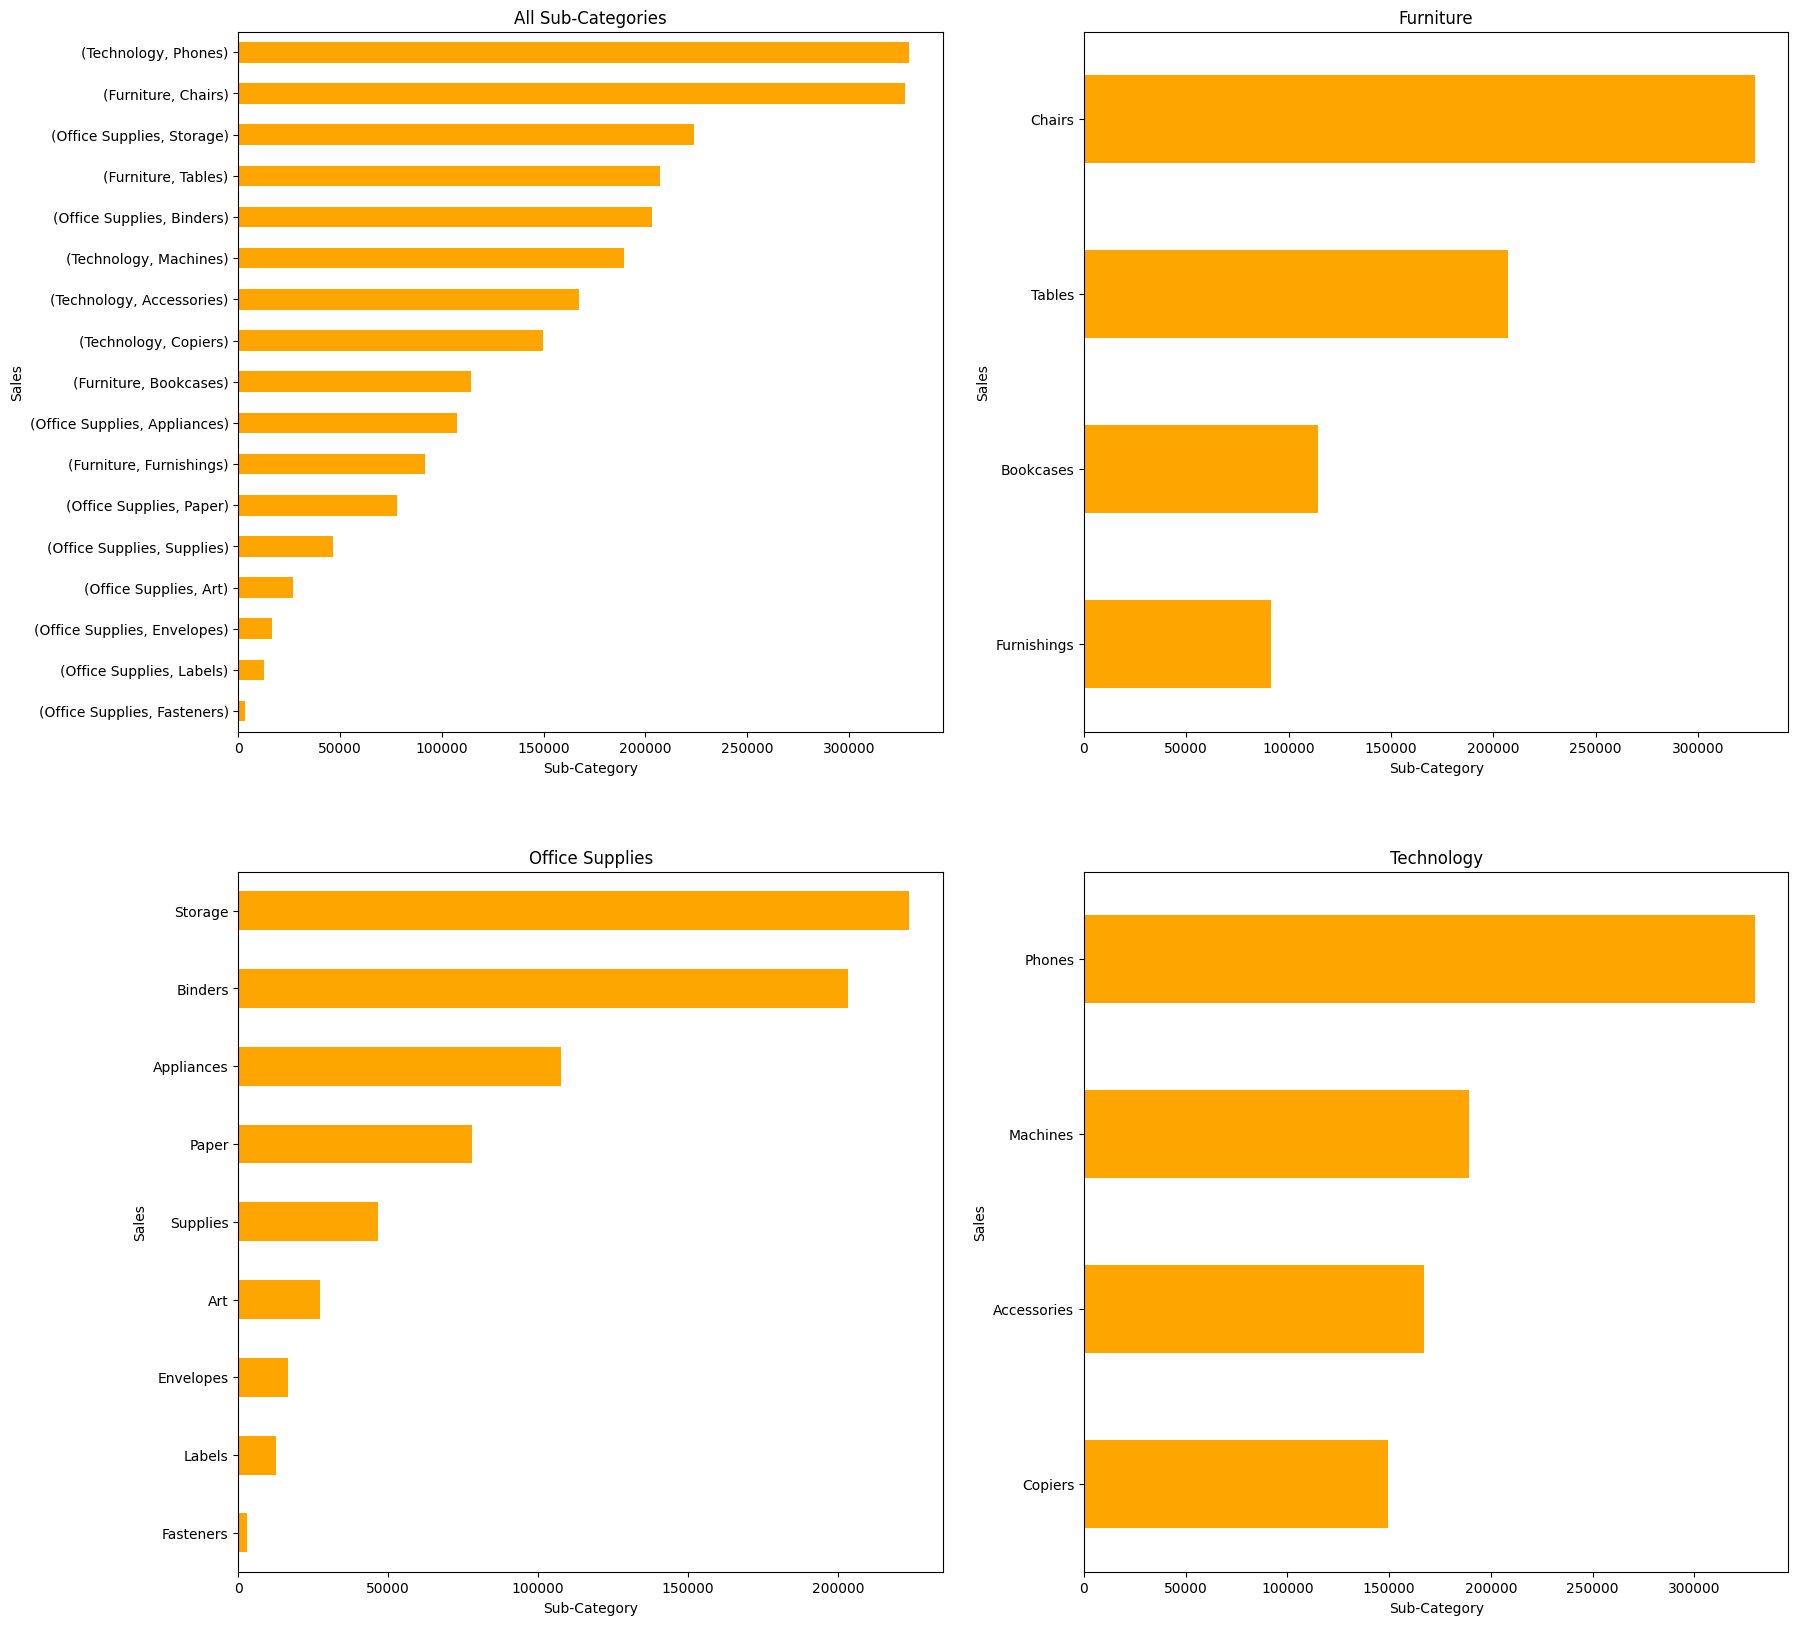

In [38]:
fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

category_sub_category_sales['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax1, color='orange')
ax1.set_title('Furniture')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales')

category_sub_category_sales['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax2, color='orange')
ax2.set_title('Office Supplies')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Sales')

category_sub_category_sales['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax3, color='orange')
ax3.set_title('Technology')
ax3.set_xlabel('Sub-Category')
ax3.set_ylabel('Sales')

category_sub_category_sales.sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax0, color='orange')
ax0.set_title('All Sub-Categories')
ax0.set_xlabel('Sub-Category')
ax0.set_ylabel('Sales')

1. Maximum Sales - (Technology, Phones), (Furniture, Chairs), (Office Supplies, Storage)

2. Minimum Sales - (Office Supplies, Fasteners), (Office Supplies, Labels), (Office Supplies, Envelopes)

# **Profit**

Text(0, 0.5, 'Sales')

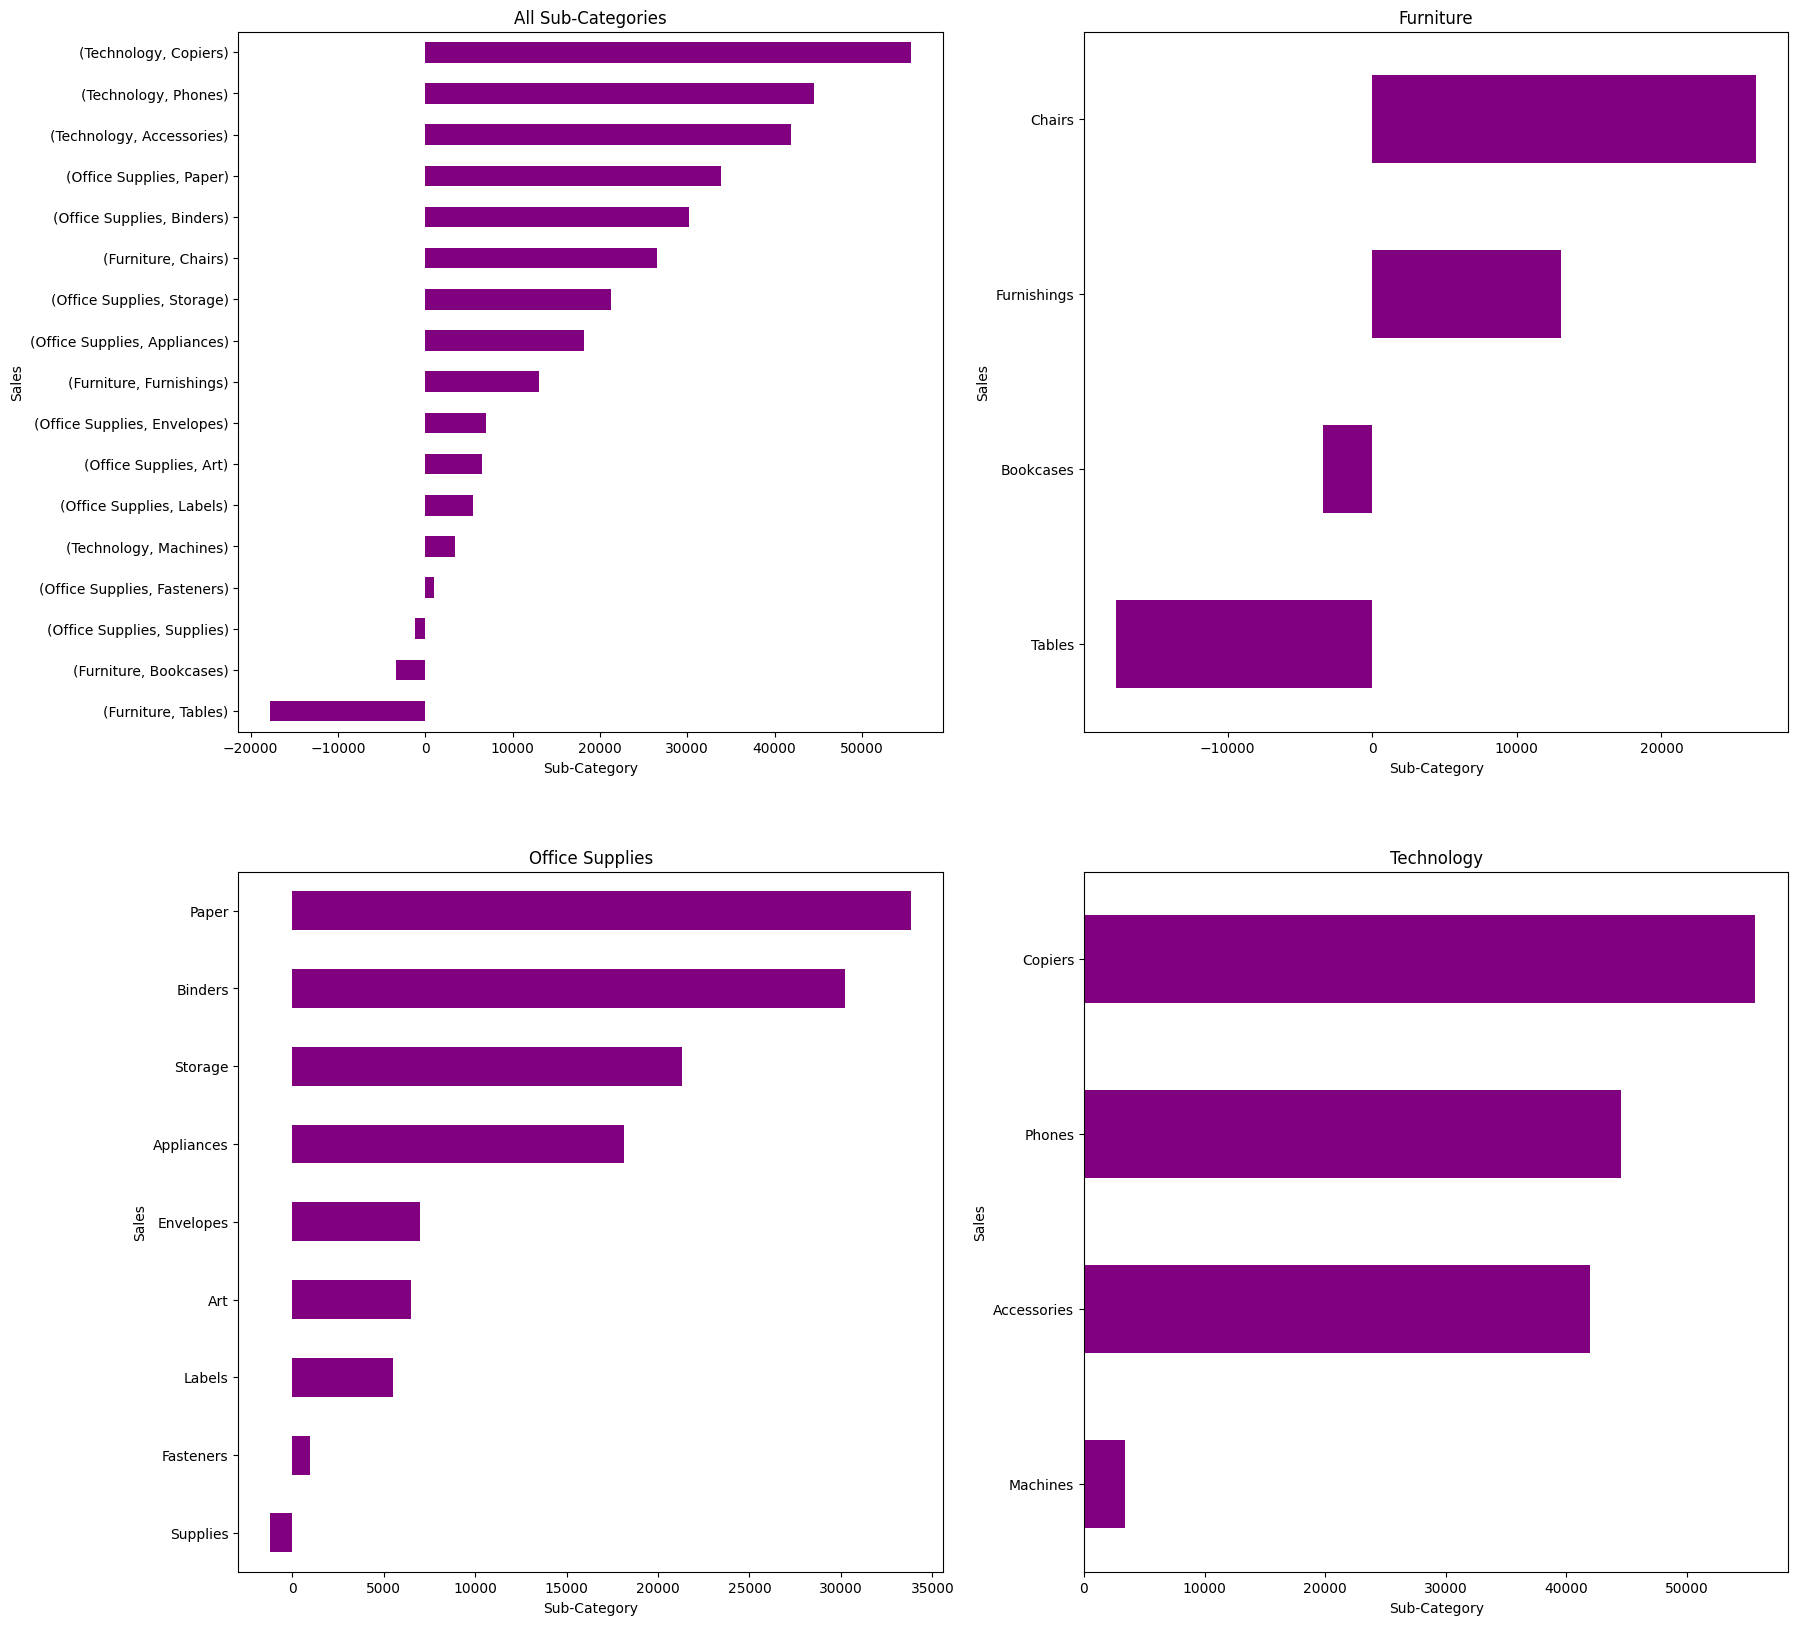

In [39]:
fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

category_sub_category_profit['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax1, color='purple')
ax1.set_title('Furniture')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales')

category_sub_category_profit['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax2, color='purple')
ax2.set_title('Office Supplies')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Sales')

category_sub_category_profit['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax3, color='purple')
ax3.set_title('Technology')
ax3.set_xlabel('Sub-Category')
ax3.set_ylabel('Sales')

category_sub_category_profit.sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax0, color='purple')
ax0.set_title('All Sub-Categories')
ax0.set_xlabel('Sub-Category')
ax0.set_ylabel('Sales')

1. Maximum Profit - (Technology, Copiers), (Technology, Phones), (Technology, Accessories)

2. Minimum Profit - (Furniture, Tables), (Furniture, Bookcases), (Office Supplies, Supplies)

# **Sub-Category: Sales & Profit Combined**

Text(0, 0.5, 'Sales')

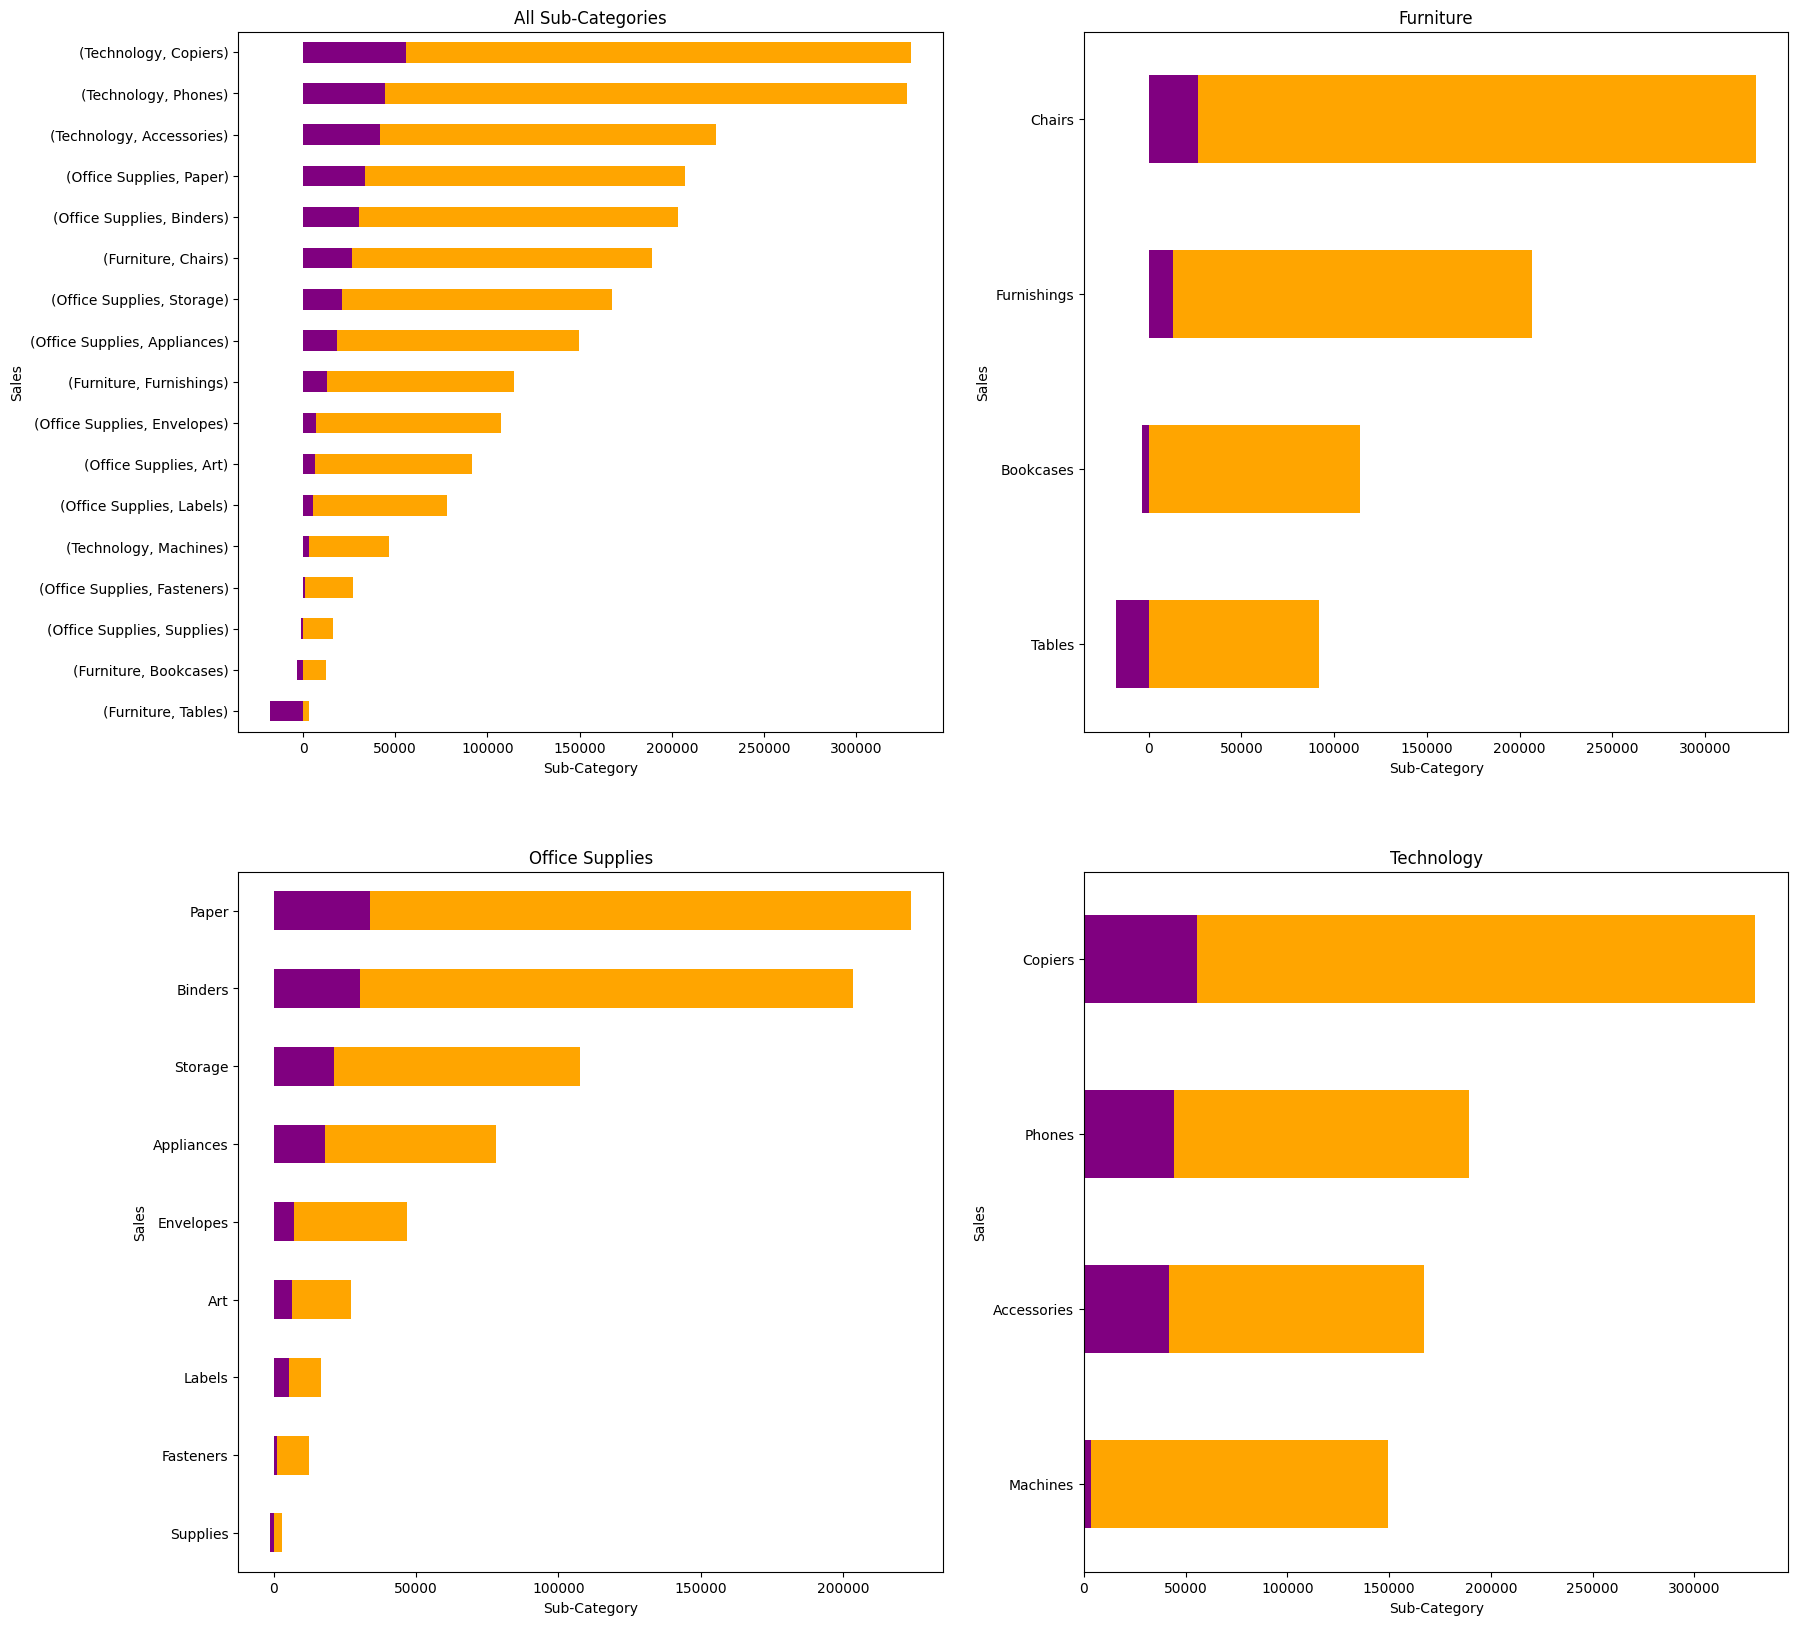

In [40]:
fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

# Sales

category_sub_category_sales['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax1, color='orange')
ax1.set_title('Furniture')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales')

category_sub_category_sales['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax2, color='orange')
ax2.set_title('Office Supplies')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Sales')

category_sub_category_sales['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax3, color='orange')
ax3.set_title('Technology')
ax3.set_xlabel('Sub-Category')
ax3.set_ylabel('Sales')

category_sub_category_sales.sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax0, color='orange')
ax0.set_title('All Sub-Categories')
ax0.set_xlabel('Sub-Category')
ax0.set_ylabel('Sales')

# Profit

category_sub_category_profit['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax1, color='purple')
ax1.set_title('Furniture')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales')

category_sub_category_profit['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax2, color='purple')
ax2.set_title('Office Supplies')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Sales')

category_sub_category_profit['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax3, color='purple')
ax3.set_title('Technology')
ax3.set_xlabel('Sub-Category')
ax3.set_ylabel('Sales')

category_sub_category_profit.sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), ax=ax0, color='purple')
ax0.set_title('All Sub-Categories')
ax0.set_xlabel('Sub-Category')
ax0.set_ylabel('Sales')

1. Maximum Sales & Profit - (Technology, Copiers), (Technology, Phones), (Technology, Accessories)

2. Minimum Sales & Profit - (Furniture, Tables), (Furniture, Bookcases), (Office Supplies, Supplies)

# **State**

In [41]:
states = data['State'].value_counts()
states

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

1. Most number of buyers are from - (California, 1980), (New York, 1119) & (Texas, 980)

2. Least number of buyers are from - (Wyoming, 1), (West Virginia, 4) & (North Dakota, 7)

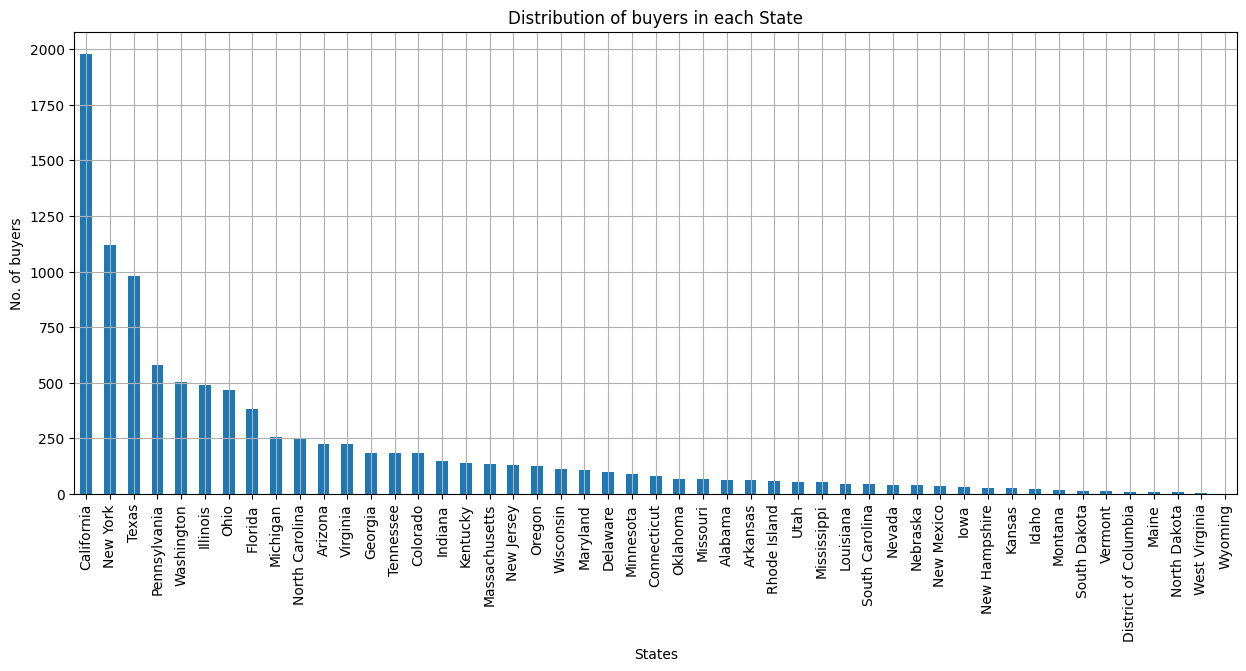

In [42]:
states.plot(kind='bar', figsize=(15, 6))
plt.title('Distribution of buyers in each State')
plt.xlabel('States')
plt.ylabel('No. of buyers')
plt.grid()
plt.show()

### **Same conclusion**

1. Most number of buyers are from - (California, 1980), (New York, 1119) & (Texas, 980)

2. Least number of buyers are from - (Wyoming, 1), (West Virginia, 4) & (North Dakota, 7)

In [43]:
state_sales = data.groupby(['State'])['Sales'].sum()
state_sales

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              456629.9285
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80127.3690
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 75879.6440
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [44]:
state_profit = data.groupby(['State'])['Profit'].sum()
state_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76215.9705
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12593.2976
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

# **State: Sales & Profit Combined**

Text(0, 0.5, 'Profit')

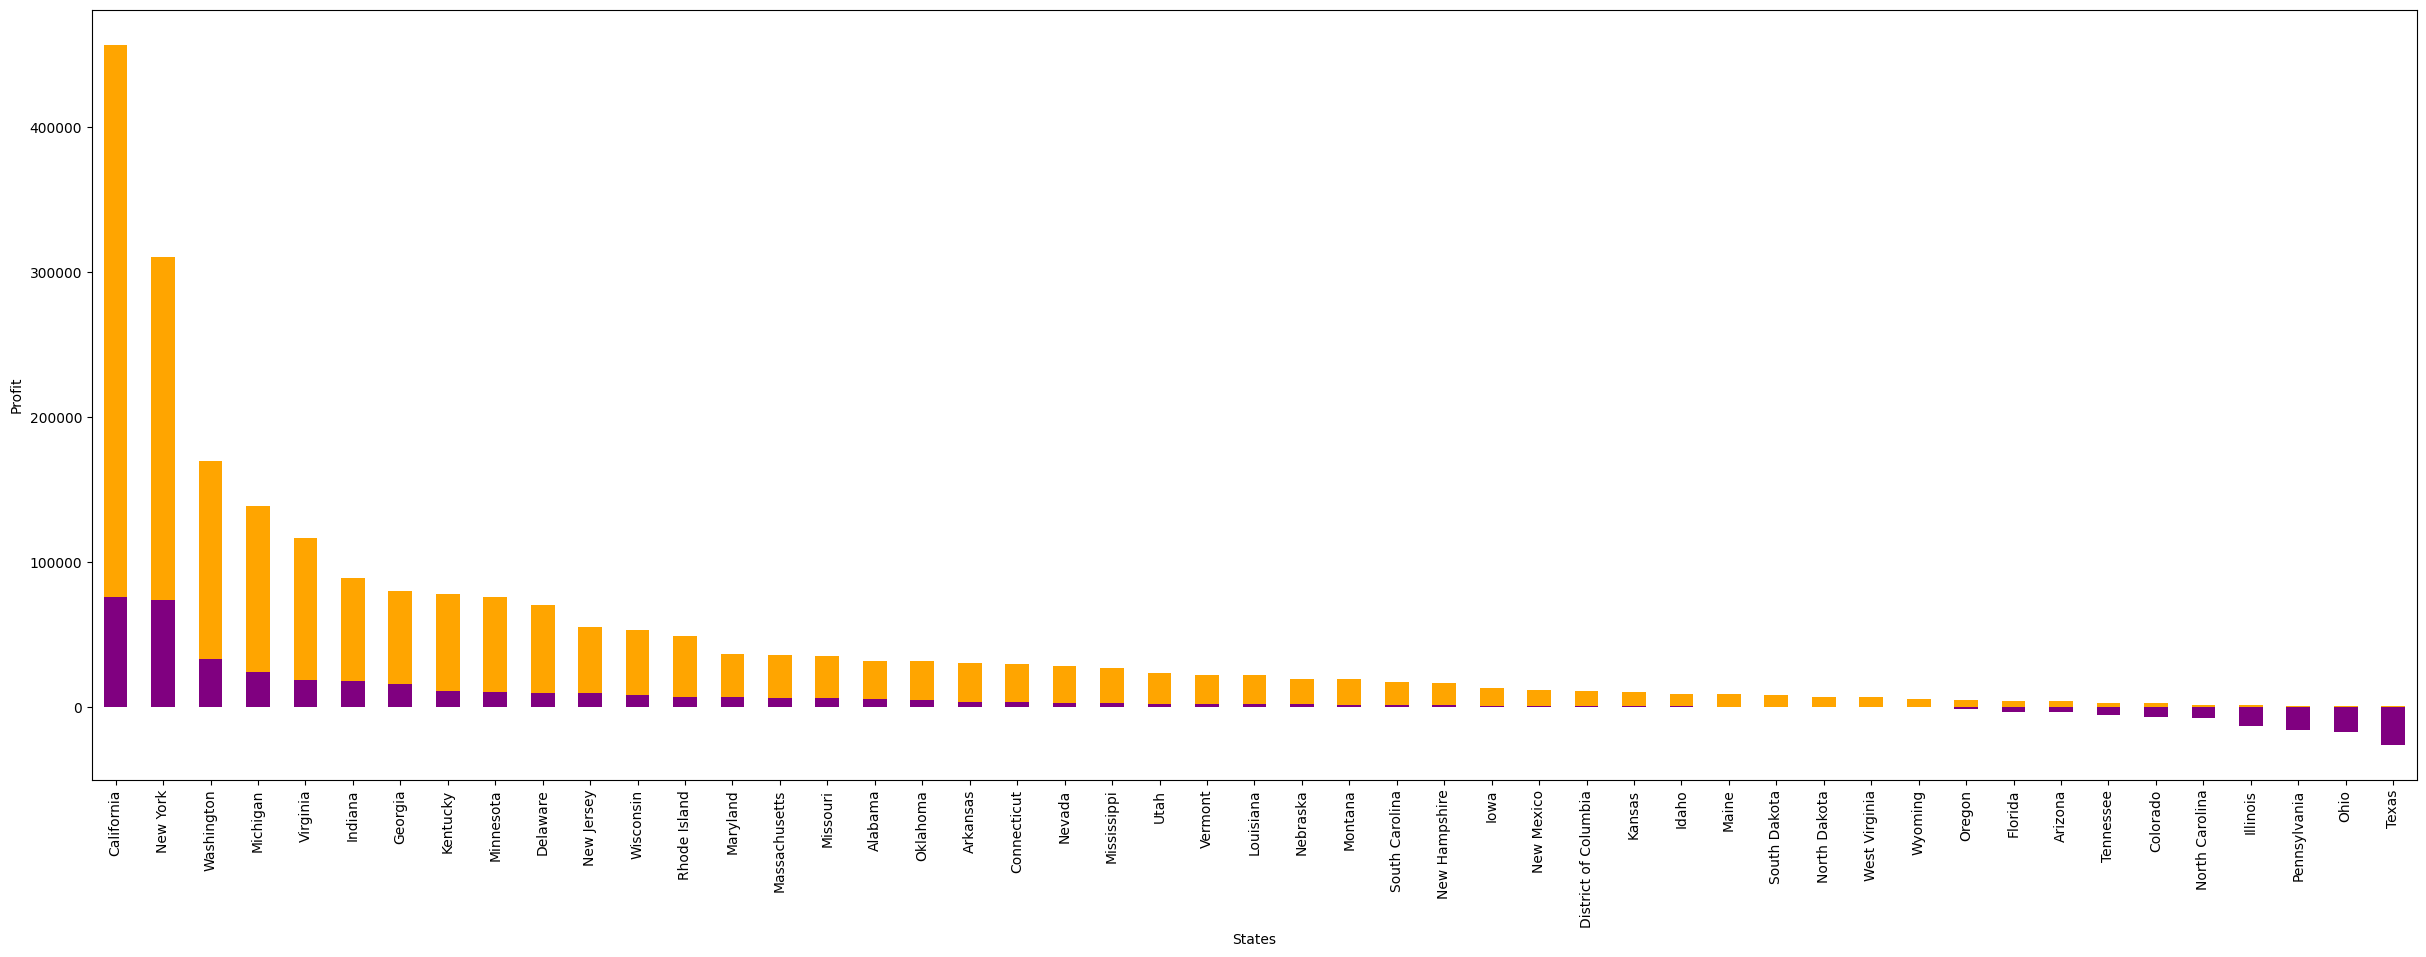

In [45]:
# Sales

state_sales.sort_values(ascending=False).plot(kind='bar', figsize=(30, 10), color='orange')
plt.xlabel('States')
plt.ylabel('Sales')

# Profit

state_profit.sort_values(ascending=False).plot(kind='bar', figsize=(30, 10), color='purple')
plt.xlabel('States')
plt.ylabel('Profit')

1. Most Profit & Sales - California, New York, Washington

2. Least Profit & Sales - Texas, Ohio, Pennsylvania

# **Segment**

In [46]:
segment = data['Segment'].value_counts()
segment

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

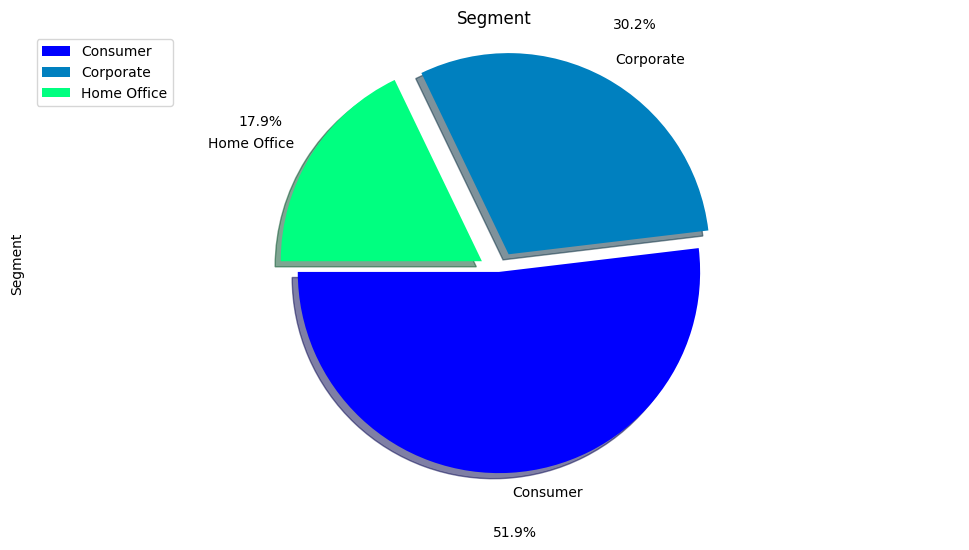

In [47]:
segment.plot(kind='pie', figsize=(12, 6), shadow=True, startangle=180, explode=[0, 0.1, 0.1], autopct='%1.1f%%', pctdistance=1.3, cmap=cm.get_cmap('winter'))
plt.title('Segment')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

1. Most Segment - Consumer (51.9%)

2. Least Segment - Home Office (17.9%)

# **Segments: Sales & Profit Combined**

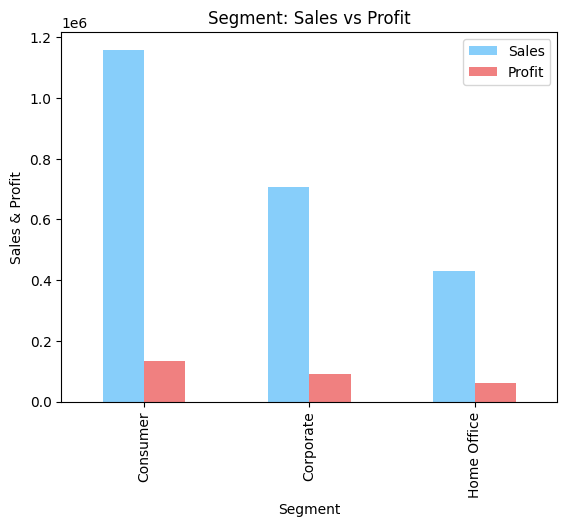

In [48]:
data.groupby('Segment')['Sales', 'Profit'].sum().plot(kind='bar', color=['lightskyblue', 'lightcoral'])
plt.title('Segment: Sales vs Profit')
plt.xlabel('Segment')
plt.ylabel('Sales & Profit')
plt.legend()
plt.show()

1. Most Profit & Sales - Consumer

2. Least Profit & Sales - Home Office

# **Region**

In [49]:
region = data['Region'].value_counts()
region

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

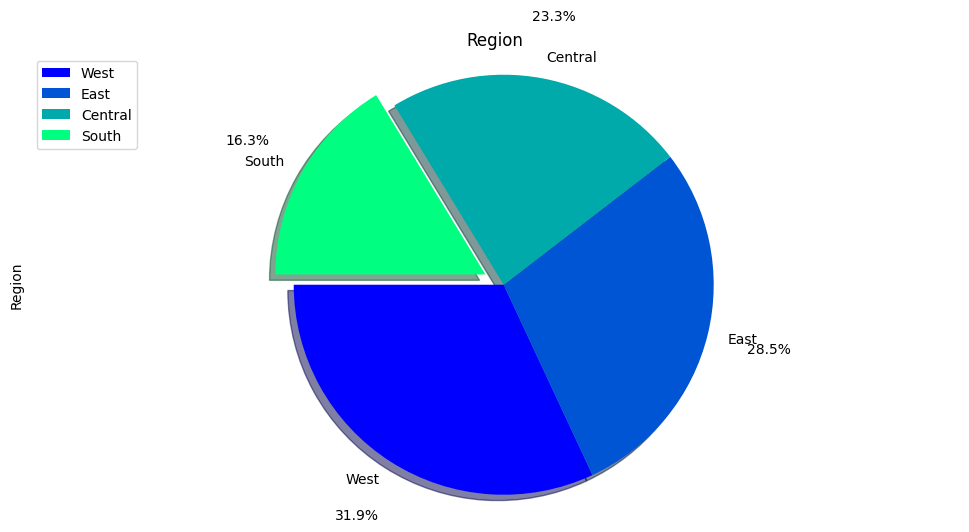

In [50]:
region.plot(kind='pie', figsize=(12, 6), shadow=True, startangle=180, explode=[0, 0, 0, 0.1], autopct='%1.1f%%', pctdistance=1.3, cmap=cm.get_cmap('winter'))
plt.title('Region')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

1. Company deals majority in - Western Region (31.9%)

2. Company deals minority in - Southern Region (16.3%)

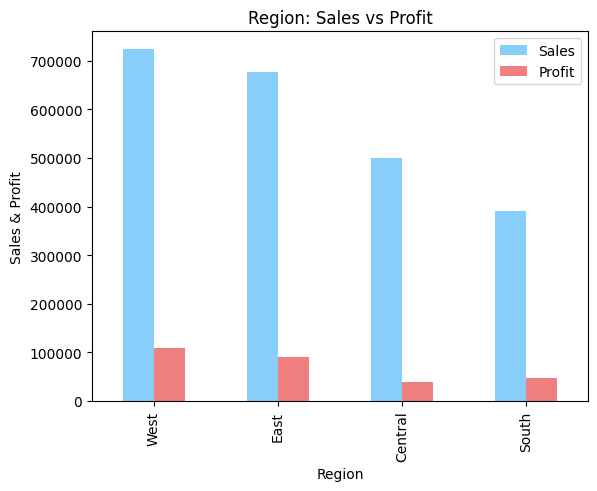

In [51]:
data.groupby('Region')['Sales', 'Profit'].sum().sort_values(by=['Sales', 'Profit'], ascending=False).plot(kind='bar', color=['lightskyblue', 'lightcoral'])
plt.title('Region: Sales vs Profit')
plt.xlabel('Region')
plt.ylabel('Sales & Profit')
plt.legend()
plt.show()

1. More profit from - Western & Eastern Region

2. Less profit from - Southern & Central Region

# **Region Wise Ship Mode**

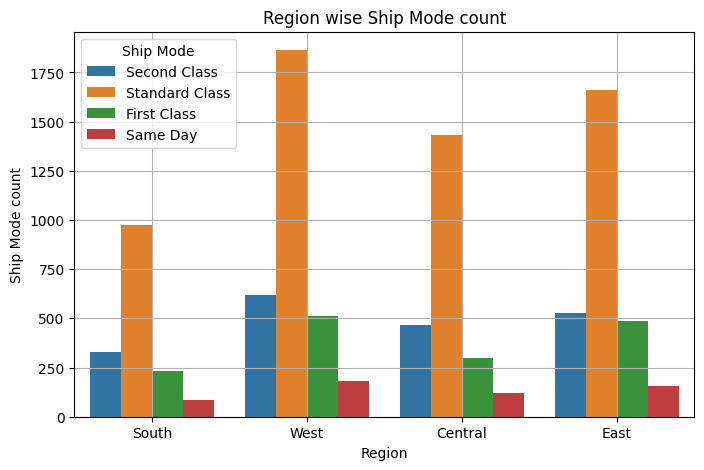

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', hue='Ship Mode', data=data)
plt.title('Region wise Ship Mode count')
plt.xlabel('Region')
plt.ylabel('Ship Mode count')
plt.grid()
plt.show()

1. Most opted Ship Mode - Standard Class

2. Least opted Ship Mode - Same Day

# **Relationship: Profit & Discount**

In [53]:
data['Discount'].corr(data['Profit'])

-0.21993898249765037

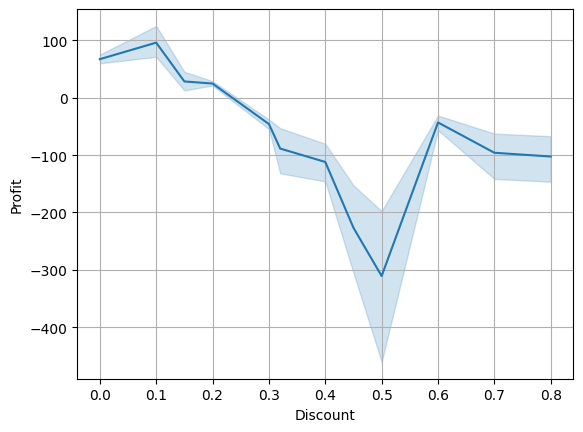

In [54]:
sns.lineplot(x='Discount', y='Profit', data=data)
plt.grid()
plt.show()

1. Discount & Profit have -ve relationship.

2. When Discount increases, Profit decreases

# **Relationship: Sales, Profit & Discount**

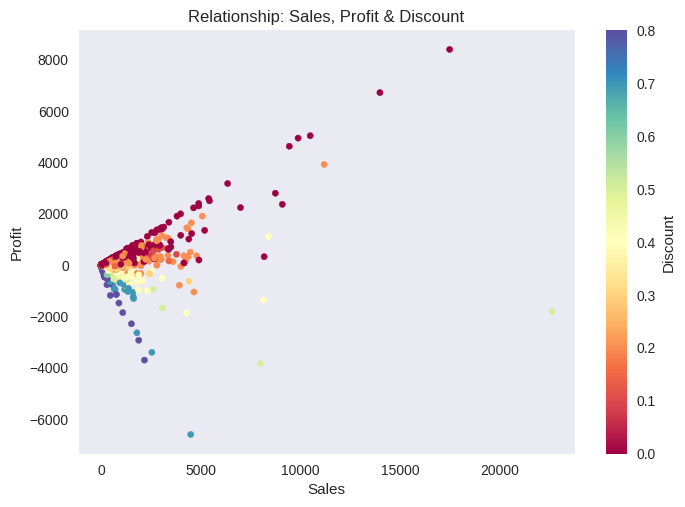

In [55]:
plt.style.use('seaborn')
data.plot(kind='scatter', x='Sales', y='Profit', c='Discount', colormap='Spectral')
plt.title('Relationship: Sales, Profit & Discount')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()
plt.show()

# **Observations**

**Relationship: Discount, Sales & Profit**
1. As Discount increases Profit decreases
2. As Discount increases Sales decreases
3. As Sales increases Profit increases

**Correlation**
1. Most correlation - Sales & Profit (0.479078)
2. Least correlation - Discount & Quantity (0.008307)

**Ship Mode**
1. Most opted Ship Mode - Standard Class
2. Least opted Ship Mode - Same Day

**Ship Mode: Profit & Sales**
1. Maximum Profit & Sales - Standard Class
2. Minimum Profit & Sales - Same Day

**Distribution**
1. Most distribution - Office Supplies (60.2%)
2. Least distribution - Technology (18.5%)

**Categories: Sales & Profit**
1. Maximum Profit & Sales - Technology
2. Minimum Profit & Sales - Office Supplies

**Distribution Sub-Category**
1. Most distribution sub-category - Binders (15.3%), Paper (13.5%), Furnishings (9.6%)
2. Least distribution sub-category - Copiers (0.7%), Machines (1.2%), Supplies (1.9%)

**Sales**
1. Maximum Sales - (Technology, Phones), (Furniture, Chairs), (Office Supplies, Storage)
2. Minimum Sales - (Office Supplies, Fasteners), (Office Supplies, Labels), (Office Supplies, Envelopes)

**Profit**
1. Maximum Profit - (Technology, Copiers), (Technology, Phones), (Technology, Accessories)
2. Minimum Profit - (Furniture, Tables), (Furniture, Bookcases), (Office Supplies, Supplies)

**Sales & Profit**
1. Maximum Sales & Profit - (Technology, Copiers), (Technology, Phones), (Technology, Accessories)
2. Minimum Sales & Profit - (Furniture, Tables), (Furniture, Bookcases), (Office Supplies, Supplies)

**No. of Buyers**
1. Most number of buyers are from - (California, 1980), (New York, 1119) & (Texas, 980)
2. Least number of buyers are from - (Wyoming, 1), (West Virginia, 4) & (North Dakota, 7)

**States: Sales & Profit**
1. Most Sales & Profit - California, New York, Washington
2. Least Sales & Profit - Texas, Ohio, Pennsylvania

**Segment**
1. Most Segment - Consumer (51.9%)
2. Least Segment - Home Office (17.9%)

**Segment: Sales & Profit**
1. Most Sales & Profit - Consumer
2. Least Sales & Profit - Home Office

**Region**
1. Company deals majority in - Western Region (31.9%)
2. Company deals minority in - Southern Region (16.3%)

**Region: Sales & Profit**
1. More profit from - Western & Eastern Region
2. Less profit from - Southern & Central Region

**Ship Mode**
1. Most opted Ship Mode - Standard Class
2. Least opted Ship Mode - Same Day

**Relationship: Discount & Profit**
1. Discount & Profit have -ve relationship.
2. When Discount increases, Profit decreases

# **Conclusion**

1. **Discount Strategy:**
   - Strategically optimize discounts to maintain profitability while attracting customers and boosting sales.

2. **Ship Mode Optimization:**
   - Emphasize the use of 'Standard Class' shipping method, as it yields the highest profit and sales.

3. **Product Category Focus:**
   - Shift a significant portion of our business towards the 'Technology' category, as it offers the highest profitability compared to 'Office Supplies'.

4. **Profitable Sub-categories:**
   - Direct efforts towards 'Copiers', 'Phones', and 'Accessories' within the 'Technology' category, as they generate the maximum profit.

5. **Sales Boost in Specific Cities:**
   - Implement targeted sales strategies in cities such as Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Illinois, Pennsylvania, Ohio, and Texas to boost sales and mitigate losses.

6. **Focus on High-Performing Cities:**
   - Allocate additional resources and marketing focus to cities with the highest number of buyers and robust sales and profit margins, notably California and New York.

7. **Consumer Segment Prioritization:**
   - Prioritize efforts towards engaging and serving the 'Consumer' segment, as it exhibits the highest potential for sales and profit.

8. **Regional Sales Focus:**
   - Concentrate on maximizing sales and profit in the Western and Eastern regions for significant business growth.